<h1>Hello World: Your First LangGraph Agent</h1>

### Intro
Welcome to the beginning of your LangGraph journey! 

In this notebook, we are going to build the "Hello World" of AI Agents. It sounds simple, but it teaches you the fundamental building blocks of LangGraph: **State**, **Nodes**, and the **Graph** itself.

**What we will build:**
An agent that takes a user's message as input and appends a friendly greeting to it.

### Step 1: Imports
We need to bring in the necessary tools. 
- `TypedDict`: This helps us define the structure of our data (the State) with specific types (like strings, integers).
- `StateGraph`: This is the main class from LangGraph that we use to define our agent's flow.

In [1]:
# Import TypedDict from the typing module to define strong types for our dictionary
from typing import Dict, TypedDict

# Import StateGraph from langgraph. This is the blueprint for our graph-based agent.
from langgraph.graph import StateGraph

### Step 2: Define the State
The **State** is the memory of your application. It acts like a shared whiteboard where different parts of your program (Nodes) can read and write data.

Here, we define `AgentState`. It's a dictionary that *must* have a key called `message` which is a string (`str`).

In [2]:
# 1. Define the State Structure
# We inherit from TypedDict to ensure our state always has the expected keys.
class AgentState(TypedDict): 
    message: str # This key 'message' will hold the string data passing through our graph.

# 2. Define the Node Function
# A Node is just a regular Python function. 
# It receives the current 'state' as input and returns an updated 'state'.
def greetingNode(state: AgentState) -> AgentState:
    """
    This function (Node) takes the current state, adds a greeting to the message,
    and returns the modified state.
    """
    print("--- Inside the Greeting Node ---")
    
    # Access the current message from the state
    current_message = state["message"]
    
    # Create the new message
    new_message = "Hey " + current_message + ", how is your day going?"
    
    # Update the state with the new message
    state["message"] = new_message
    
    # Return the updated state so the graph knows what changed
    return state

### Step 3: Build the Graph
Now we assemble the pieces.
1. **Initialize `StateGraph`**: We tell it to use our `AgentState` structure.
2. **Add Nodes**: We register our `greetingNode` function and give it a name (string) like "greeter".
3. **Set Entry Point**: Where does the application start? We tell it to start at the "greeter" node.
4. **Set Finish Point**: Where does it end? After "greeter", we are done.
5. **Compile**: This essentially "locks in" the structure and gets it ready to run.

In [3]:
# Initialize the Graph with our specific State schema
graph = StateGraph(AgentState)

# Add our node. The first argument "greeter" is the unique name we give this node.
# The second argument 'greetingNode' is the actual function to execute.
graph.add_node("greeter", greetingNode)

# Set the entry point. When the graph runs, it will go to "greeter" first.
graph.set_entry_point("greeter")

# Set the finish point. After "greeter" finishes, the graph execution stops.
graph.set_finish_point("greeter")

# Compile the graph. This creates a Runnable 'app' that we can invoke.
app = graph.compile()

### Step 4: Visualize
LangGraph has a cool feature where you can see what you built. We use Mermaid diagrams to visualize the flow.
(Note: This might require `langchain_core` extra dependencies, if it fails, don't worry, the code still runs!)

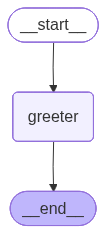

In [4]:
from IPython.display import Image, display

# Generate a Mermaid PNG image of the graph layout
display(Image(app.get_graph().draw_mermaid_png()))

### Step 5: Run the Agent
We use `.invoke()` to run the agent. 
We must pass in the initial state. In our case, we pass a dictionary with the starting `message`.

In [5]:
# The input must match the AgentState structure.
input_data = {"message": "Bob"}

# invoke() takes the input, runs the graph, and returns the FINAL state.
result = app.invoke(input_data)

--- Inside the Greeting Node ---


### The Result
Let's see what happened. The `result` variable holds the final state after all nodes have run.

In [6]:
# Print the specific key 'message' from the final result dictionary
print(f"Final Message: {result['message']}")

# Let's look at the full result dictionary to see the structure
print(f"Full State: {result}")

Final Message: Hey Bob, how is your day going?
Full State: {'message': 'Hey Bob, how is your day going?'}


### Explanation of Output
1. You passed in `{"message": "Bob"}`.
2. The graph started as `greeter` node.
3. `greetingNode` ran, printed "--- Inside the Greeting Node ---".
4. It modified the message to "Hey Bob, how is your day going?".
5. The graph finished.
6. Use see the final dictionary returned above.